In [ ]:
# install packages

install.packages('pacman')
install.packages('tidyverse')
install.packages('magrittr')
install.packages('lubridate')
install.packages('iNEXT')
install.packages('vegan')
install.packages('RAM')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘permute’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘formatR’, ‘abind’, ‘lambda.r’, ‘futile.options’, ‘magic’, ‘lpSolve’, ‘linprog’, ‘RcppProgress’, ‘tmvnsim’, ‘gtools’, ‘caTools’, ‘Rtsne’, ‘png’, ‘rjson’, ‘jpeg’, ‘bitops’, ‘futile.logger’, ‘geometry’, ‘sp’, ‘pixmap’, ‘fastmatch’, ‘igraph’, ‘quadprog’, ‘maps’, ‘clusterGeneration’, ‘coda’, 

In [ ]:
# chamando as libs necessárias

pacman::p_load(tidyverse, magrittr, lubridate, iNEXT, vegan, RAM)


In [ ]:
# lendo o arquivo de entrada
df <- read_csv("data_mata.csv")

df <- df %>% mutate(`Espécie` = case_when(`Espécie` == 'Tabanus antarcticus' ~ 'Tabanus antarticus',
                                          `Espécie` == 'Tabaus antarcticus' ~ 'Tabanus antarticus', 
                                          `Espécie` == 'Tabanus occidentalis var. dorsovittatus' ~ 'Tabanus occidentalis',
                                          `Espécie` == 'Tabanus occidentalis var. modestus' ~ 'Tabanus occidentalis',
                                          `Espécie` == 'Tabanus occidentalis var.modestus' ~ 'Tabanus occidentalis',
                                          `Espécie` == 'Tabanus occidentalis var. ?dorsovittatus' ~ 'Tabanus occidentalis',
                                          `Espécie` == 'Tabanus rupripes' ~ 'Tabanus rubripes',
                                          `Espécie` == 'Tabanus ?fuscofasciatus' ~ 'Tabanus fuscofasciatus', 
                                          `Espécie` == 'Tabanus occiedntalis' ~ 'Tabanus occidentalis', 
                                          `Espécie` == 'Tabanus ?cicur' ~ 'Tabanus circus',
                                          TRUE ~ `Espécie`), Localidade = case_when(Localidade == 'P2- Hélio' ~ 'P2 - Hélio',
                                                                                    TRUE ~ Localidade))

df <- df %>% filter(`Espécie` != 'Família Syrphidae')                                                                                   

Rows: 1034 Columns: 19

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (15): Código, Espécie, Sexo, Localidade, Latitude, Longitude, Ambiente, ...
dbl  (4): Umidade média (%), Chuva média (mm), Pressão média (hPa), Pto. Orv...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



`summarise()` has grouped output by 'Espécie'. You can override using the `.groups` argument.



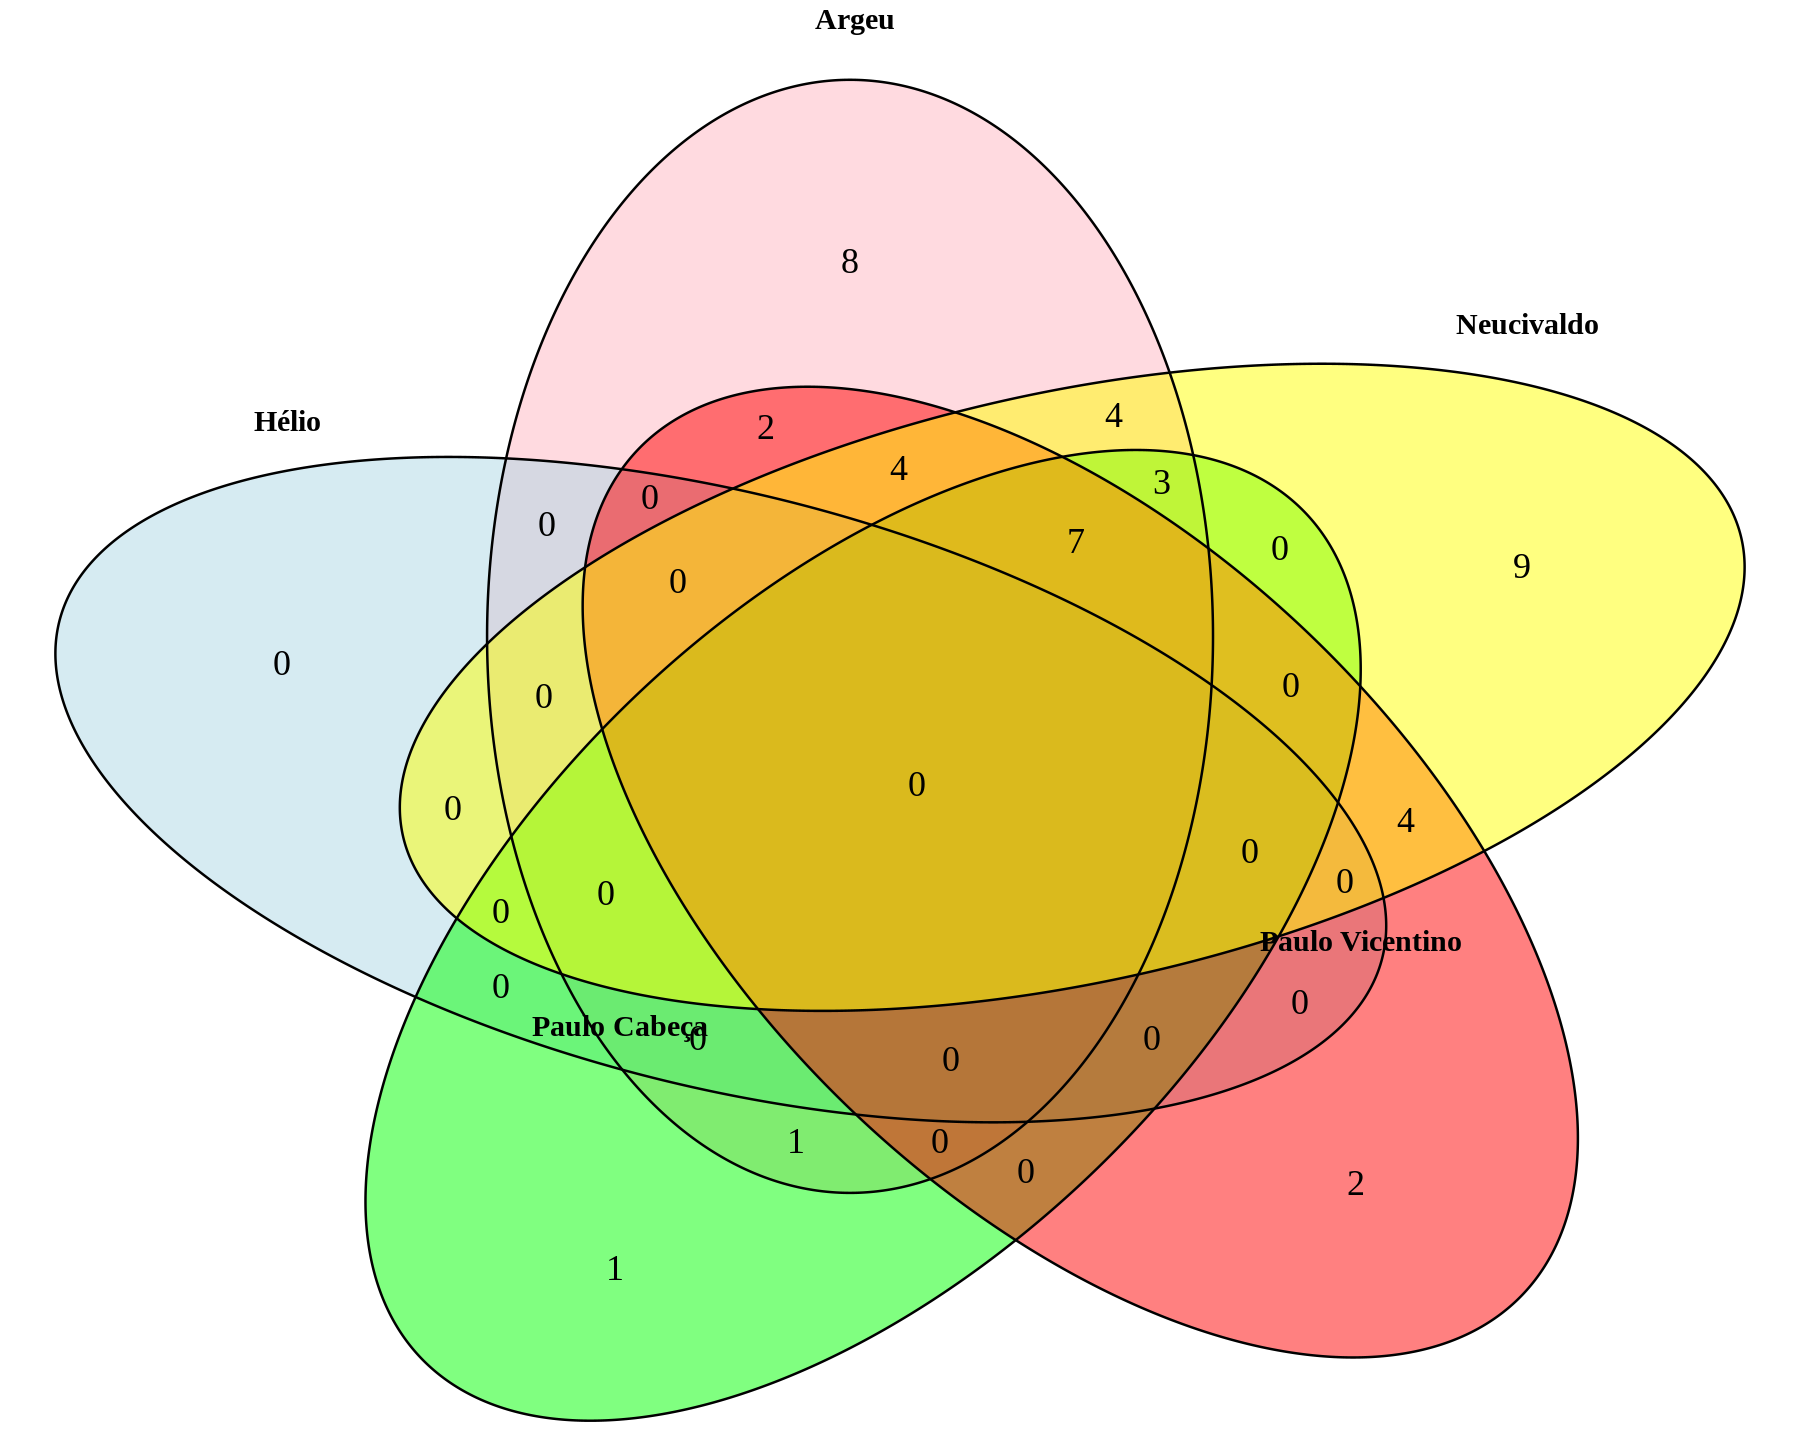

In [ ]:
# Diagrama de Venn

count <- df %>%
  group_by(`Espécie`, Localidade) %>%
  summarise(total = n())

p1 <- count %>%
  filter(Localidade == "P1 - Argeu") %>%
  select(Localidade, `Espécie`)

p2 <- count %>%
  filter(Localidade == "P2- Hélio") %>%
  select(Localidade, `Espécie`)

p3 <- count %>%
  filter(Localidade == "P3 - Paulo Cabeça") %>%
  select(Localidade, `Espécie`)

p4 <- count %>%
  filter(Localidade == "P4 - Paulo Vicentino") %>%
  select(Localidade, `Espécie`)

p5 <- count %>%
  filter(Localidade == "P5 - Nelcivaldo") %>%
  select(Localidade, `Espécie`)

options(repr.plot.width=15, repr.plot.height=12)

group.venn(list(Argeu = p1$Espécie, `Hélio` = p2$Espécie, `Paulo Cabeça` = p3$Espécie, `Paulo Vicentino` = p4$Espécie, Neucivaldo = p5$Espécie),
  label = FALSE,
  fill = c("lightpink", "lightblue", "green", "red", "yellow"),
  cat.pos = c(1, 1, 1, 1, 1),
  cex = 1.8
)

In [ ]:
# top 5 specie

top_specie <- df %>% group_by(Espécie) %>%
  summarise(total = n()) %>%
  arrange(-total) %>% slice(1:5)  

`summarise()` has grouped output by 'Mês'. You can override using the `.groups` argument.

Warning message:
“Ignoring unknown parameters: binwidth”


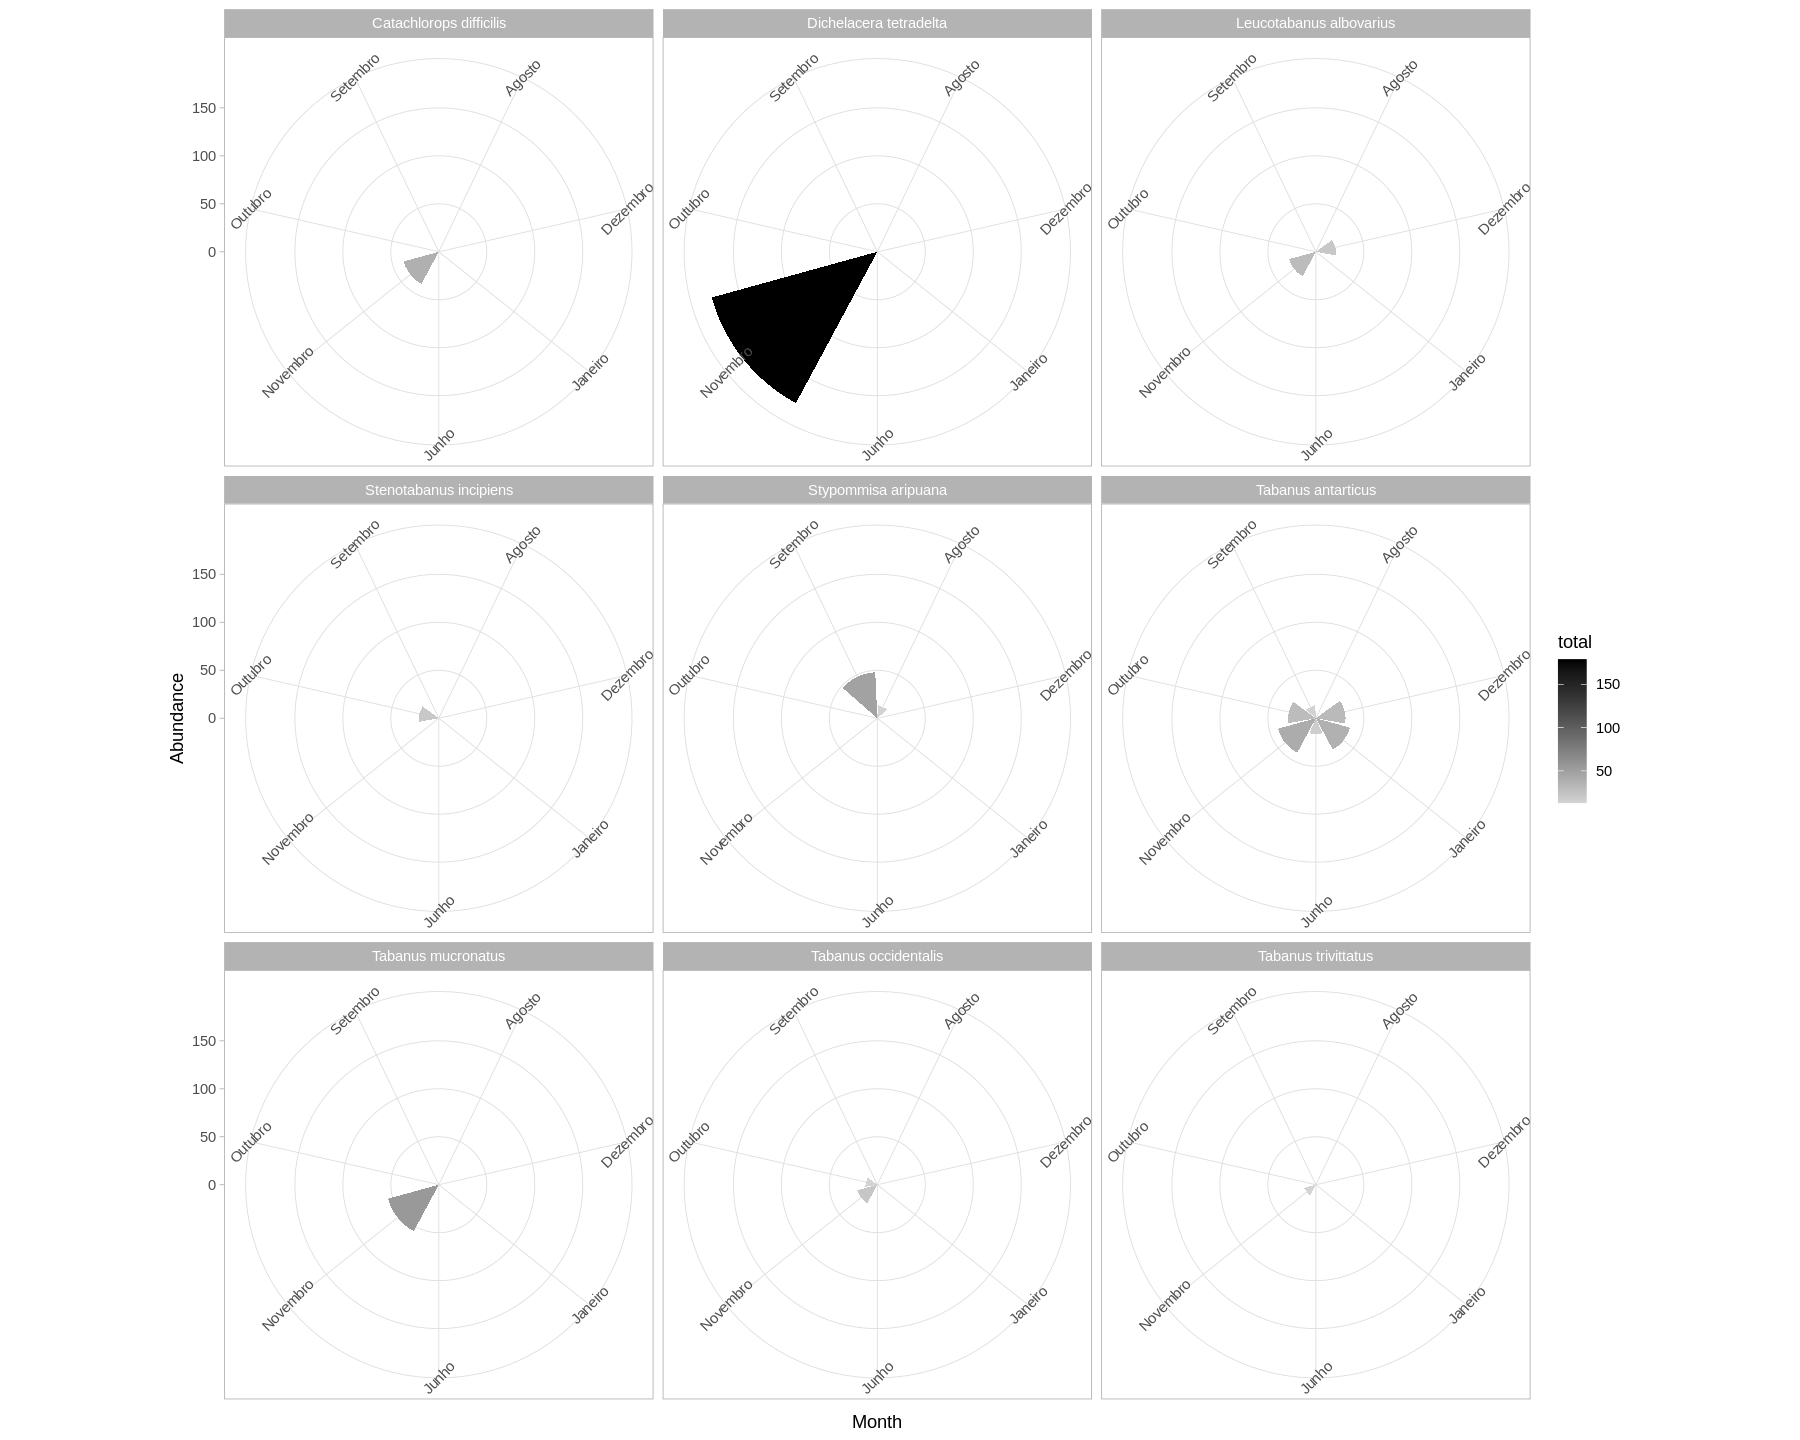

In [ ]:
# Coletas por mês

collect_by_month <- df %>% group_by(Mês, Espécie) %>%
  summarise(total = n()) %>%
  arrange(-total) %>%  filter(total >= 12)

options(repr.plot.width=15, repr.plot.height=12)

ggplot(collect_by_month, aes(Mês, total, fill = total)) +
  geom_bar(binwidth = 1, stat = "identity") +
  theme_light() +
  scale_fill_gradient(low = "lightgray", high = "black") +
  facet_wrap(~Espécie) +
  ylab("Abundance") +
  xlab("Month") +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
  coord_polar()


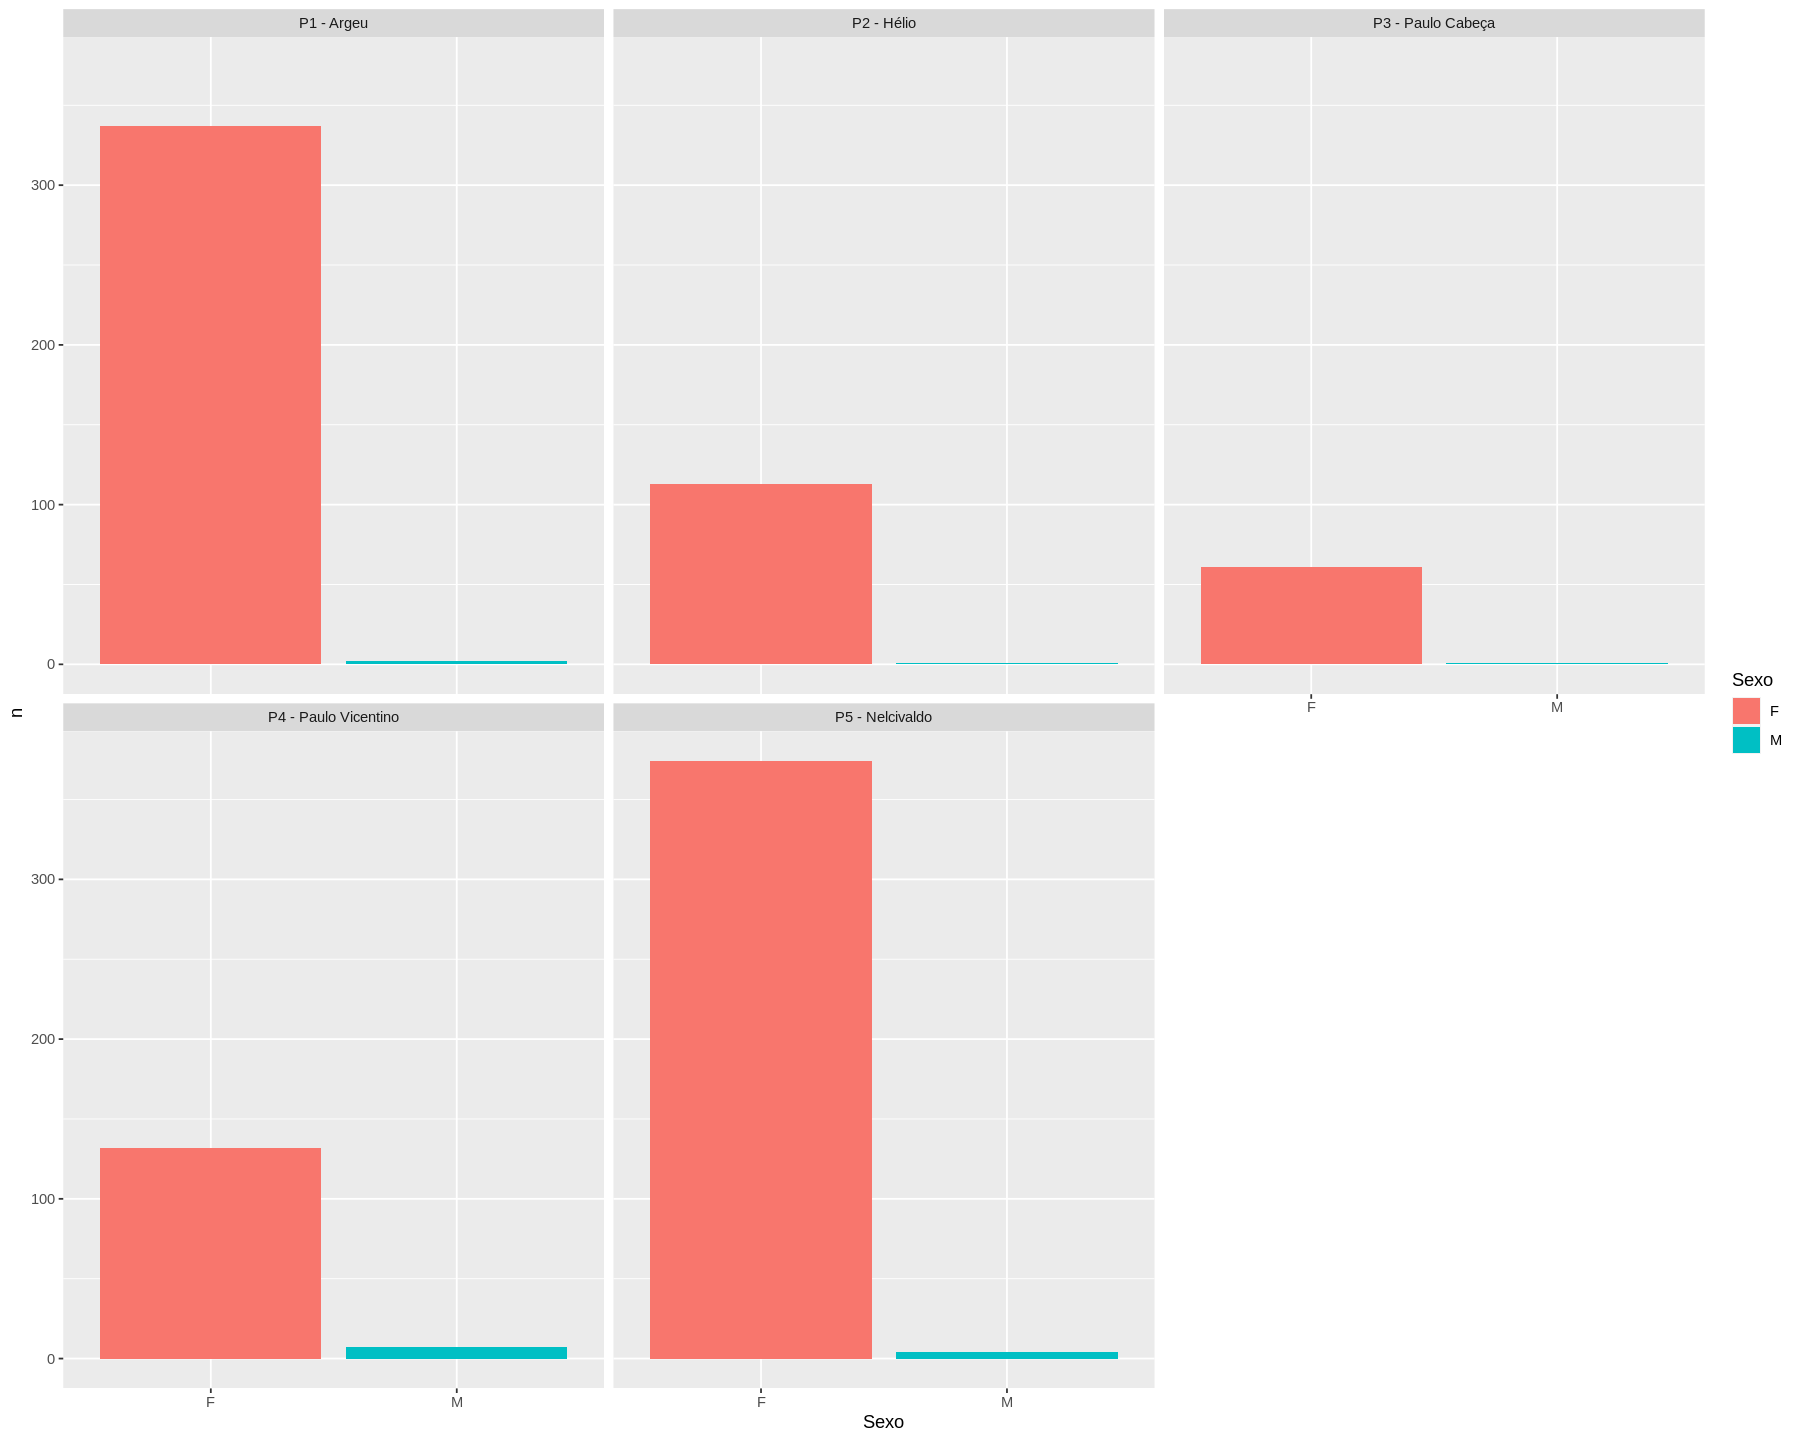

In [ ]:
# Sexo
options(repr.plot.width=15, repr.plot.height=12)

df %>% group_by(Sexo, Localidade) %>%
  count() %>%
  ggplot(aes(x=Sexo, y=n, fill=Sexo)) +
  geom_col() +
  facet_wrap(~Localidade)

`summarise()` has grouped output by 'Localidade'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'Espécie', 'Localidade'. You can override using the `.groups` argument.



           1         2         3         4         5         6         7
2  0.4285714                                                            
3  0.6923077 0.6190476                                                  
4  0.8095238 0.6250000 0.6190476                                        
5  0.8888889 0.8461538 0.7777778 0.6923077                              
6  0.4000000 0.6000000 0.8000000 0.7333333 0.6666667                    
7  0.6000000 0.4666667 0.8000000 0.6000000 0.8333333 0.5714286          
8  0.6666667 0.6923077 0.7777778 0.6923077 0.6000000 0.5000000 0.6666667
9  0.7647059 0.6666667 0.8823529 0.6666667 0.5555556 0.6363636 0.6363636
10 0.7894737 0.5714286 0.6842105 0.4285714 0.4545455 0.6923077 0.5384615
11 0.8666667 1.0000000 1.0000000 1.0000000 0.7142857 1.0000000 1.0000000
12 0.6842105 0.7142857 0.7894737 0.7142857 0.6363636 0.5384615 0.6923077
13 0.8888889 0.8461538 1.0000000 0.8461538 0.8000000 0.8333333 0.8333333
14 0.6666667 0.6923077 0.7777778 0.8461538 0.800000

Run 0 stress 0.1861927 
Run 1 stress 0.1897012 
Run 2 stress 0.1902712 
Run 3 stress 0.1952655 
Run 4 stress 0.1863803 
... Procrustes: rmse 0.07696877  max resid 0.4726631 
Run 5 stress 0.1930927 
Run 6 stress 0.1891819 
Run 7 stress 0.1901978 
Run 8 stress 0.1871348 
Run 9 stress 0.1862941 
... Procrustes: rmse 0.07624813  max resid 0.4729622 
Run 10 stress 0.1901963 
Run 11 stress 0.1929861 
Run 12 stress 0.1929378 
Run 13 stress 0.1856456 
... New best solution
... Procrustes: rmse 0.03809517  max resid 0.1865021 
Run 14 stress 0.2033484 
Run 15 stress 0.2011767 
Run 16 stress 0.1989413 
Run 17 stress 0.1913466 
Run 18 stress 0.1879923 
Run 19 stress 0.1923867 
Run 20 stress 0.197268 
*** No convergence -- monoMDS stopping criteria:
    20: stress ratio > sratmax


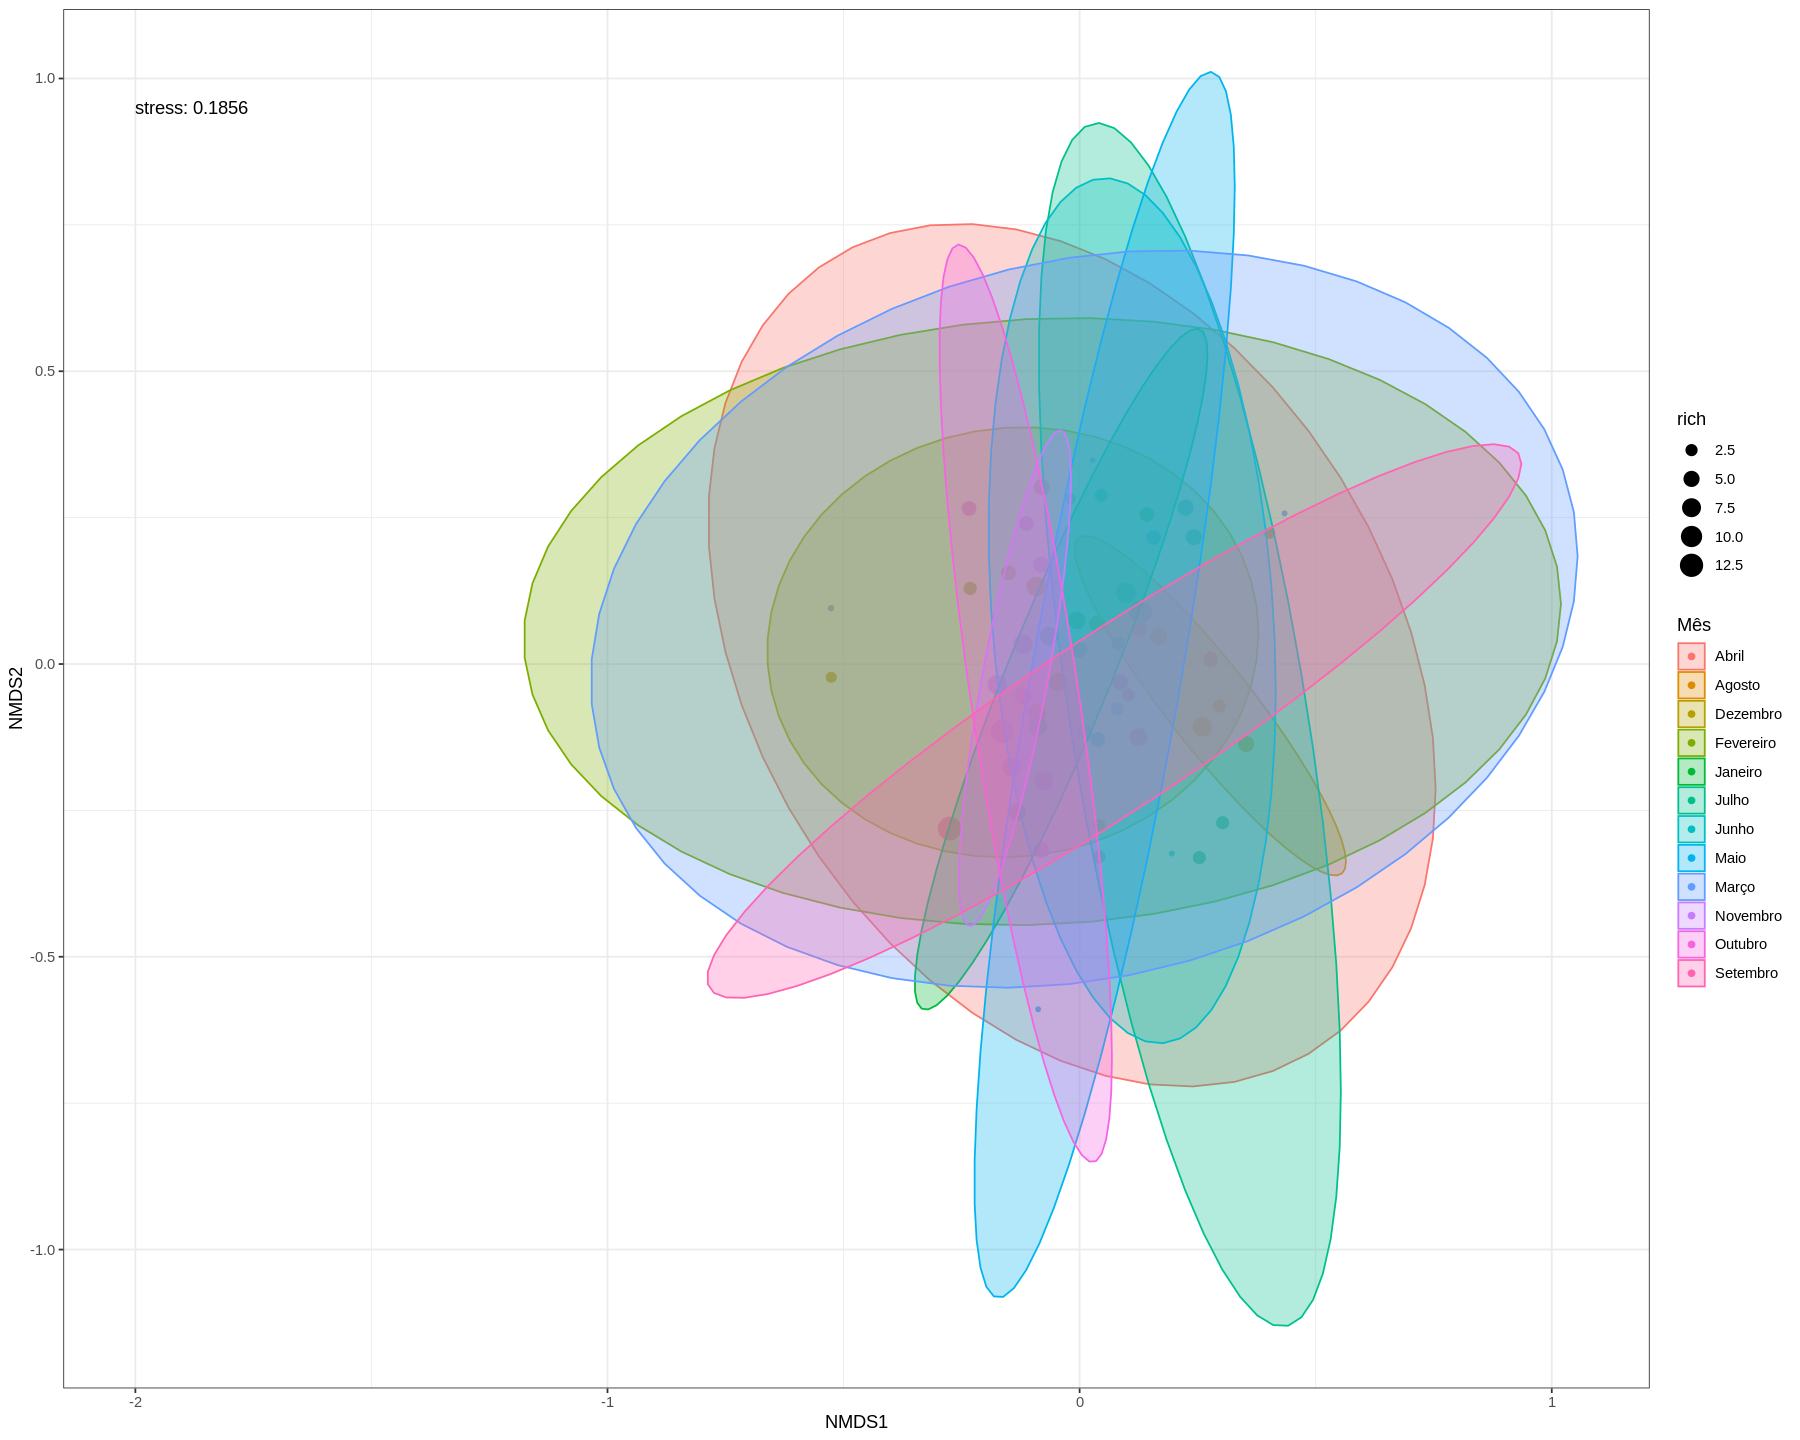

In [ ]:
# NMDS

rich <- df  %>%  group_by(Localidade, Mês) %>%
  summarise(rich = n_distinct(Espécie))

data_nmds <- df %>%
  group_by(Espécie, Localidade, Mês) %>%
  summarise(abund = n()) %>%
  pivot_wider(names_from = Espécie, values_from = abund) %>%
  mutate(
    across(everything(), ~ replace_na(.x, 0))
  ) %>% left_join(rich, by = c("Localidade", "Mês"))


run_nmds <- data_nmds

run_nmds$Localidade <- NULL
run_nmds$Mês <- NULL
run_nmds$rich <- NULL

dist_bray <- vegdist(run_nmds, method = "bray", binary = TRUE)

nmds <- metaMDS(dist_bray)

options(repr.plot.width=15, repr.plot.height=12)

scores(nmds)  %>%
  as_tibble() %>%
  cbind(data_nmds) %>%
  as_tibble()%>%
  ggplot(aes(x = NMDS1, y = NMDS2)) +
  geom_point(aes(size = rich, color = Mês)) +
  stat_ellipse(geom = "polygon", aes(group = Mês, color = Mês, fill = Mês), alpha = 0.3) +
  annotate("text", x = -2, y = 0.95, label = paste0("stress: ", format(nmds$stress, digits = 4)), hjust = 0) +
  theme_bw()

In [ ]:
# Permanova

adonis(dist_bray~data_nmds$Localidade, permutations = 1000)



Call:
adonis(formula = dist_bray ~ data_nmds$Localidade, permutations = 1000) 

Permutation: free
Number of permutations: 1000

Terms added sequentially (first to last)

                     Df SumsOfSqs MeanSqs F.Model      R2   Pr(>F)    
data_nmds$Localidade  4    3.3708 0.84271   3.455 0.20997 0.000999 ***
Residuals            52   12.6832 0.24391         0.79003             
Total                56   16.0540                 1.00000             
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

`geom_smooth()` using formula 'y ~ x'



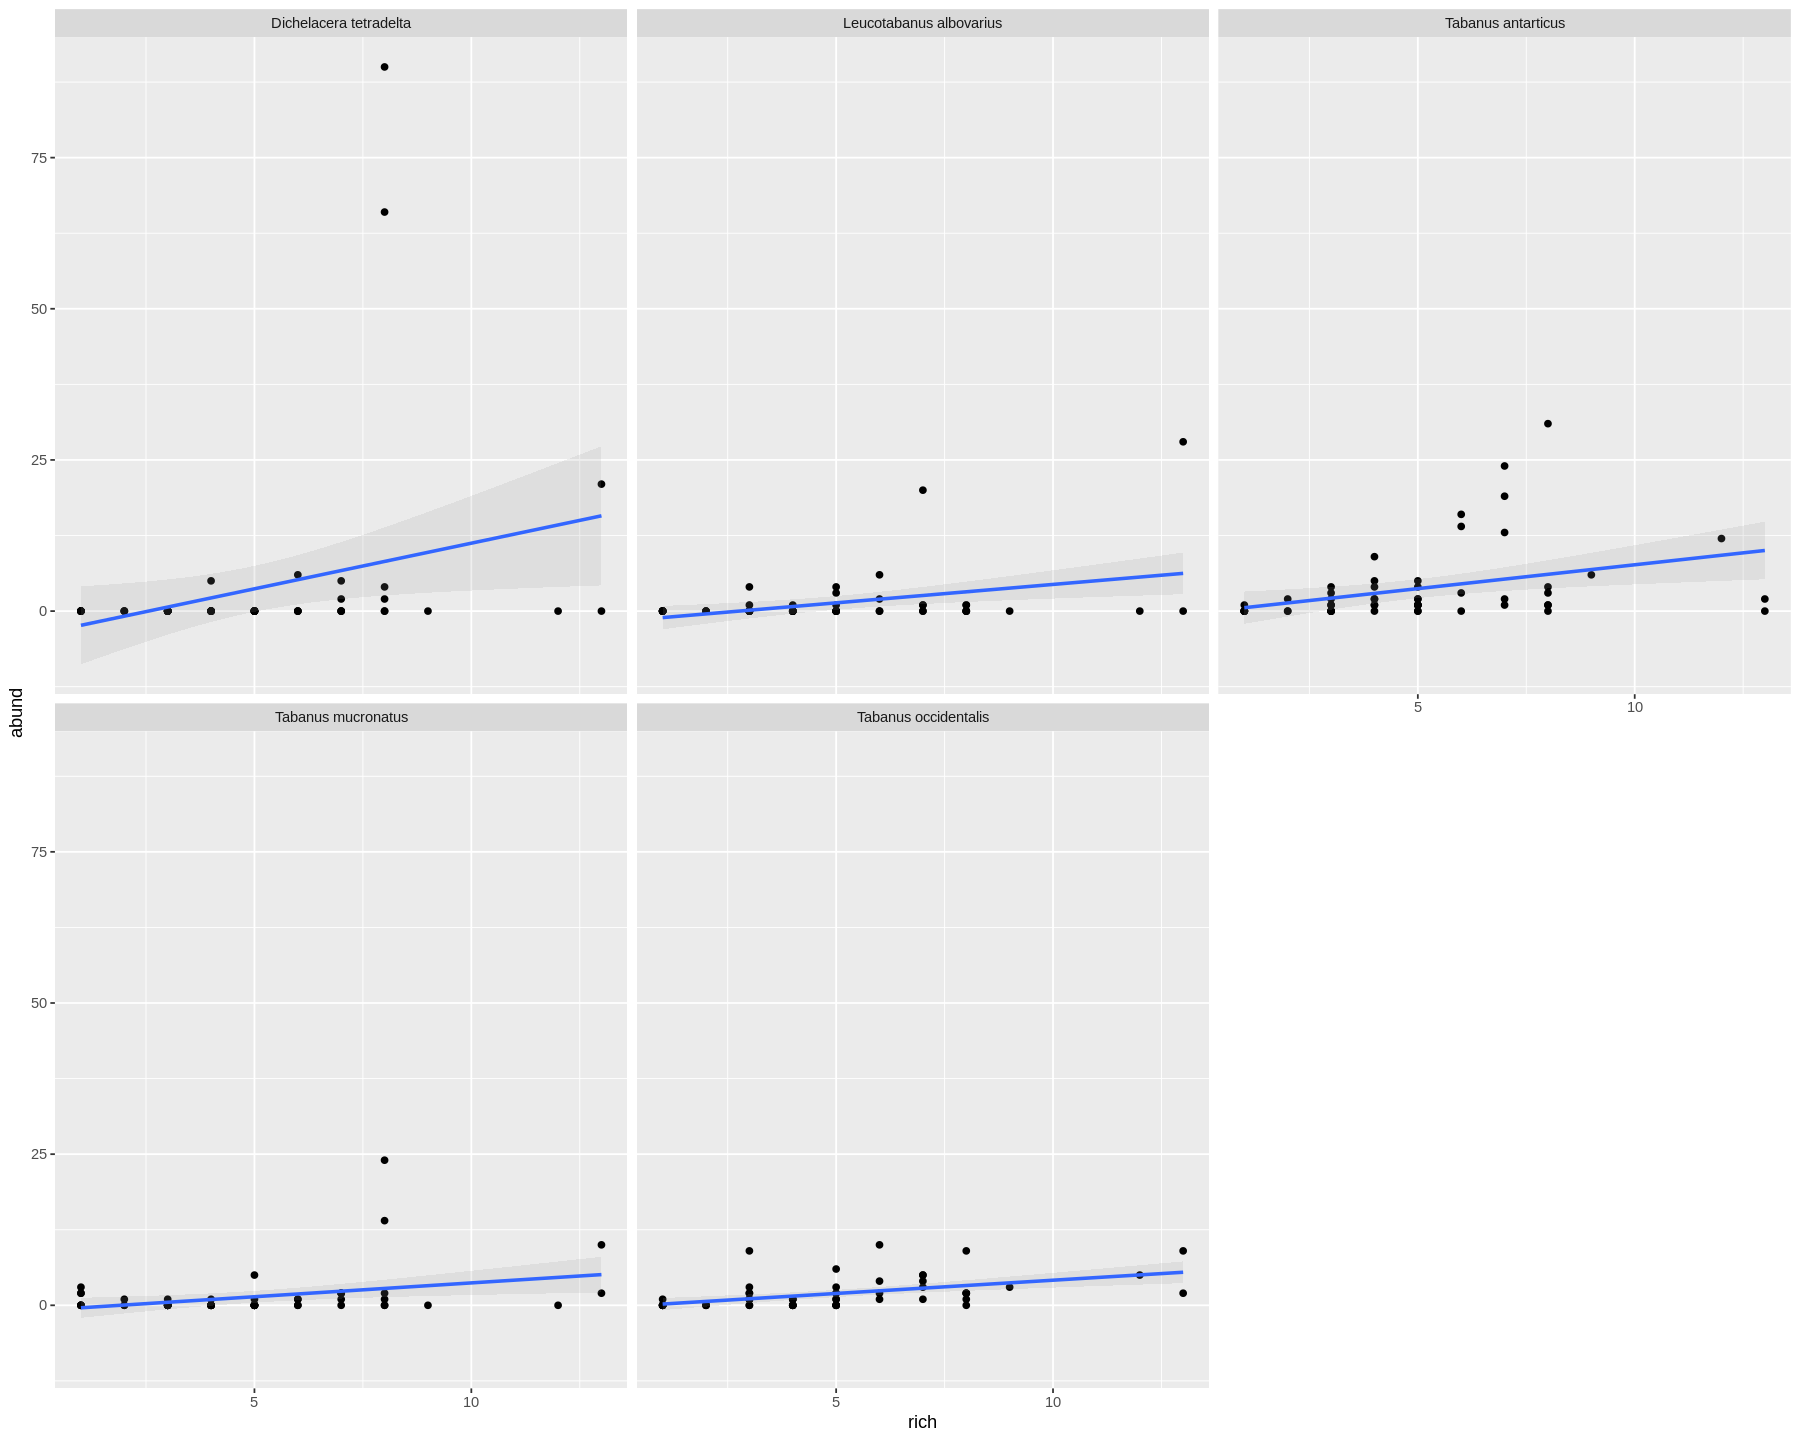

In [ ]:
# Rich x Abund


rich_abund <- data_nmds %>% 
  pivot_longer(!c(Localidade, Mês, rich), names_to = "Espécie", values_to = "abund") %>% 
  filter(Espécie %in% top_specie$Espécie)

options(repr.plot.width=15, repr.plot.height=12)

ggplot(rich_abund, aes(x = rich, y = abund)) +
  geom_point() +
  geom_smooth(method = "lm", alpha = .15) +
  facet_wrap(~Espécie)

In [ ]:
# Temperatura, umidade. pressão, orvalho

df_climatics <- df %>% group_by(Mês) %>%
  summarise(
    total = n(),
    temp = mean(as.numeric(`Temperatura média (°C)`)),
    um = mean(as.numeric(`Umidade média (%)`)),
    or = mean(as.numeric(`Pto. Orvalho média (°C)`)),
    pre = mean(as.numeric(`Pressão média (hPa)`))
  )

df_climatics[4,3] <- 25.36

Warning message in mean(as.numeric(`Temperatura média (°C)`)):
“NAs introduced by coercion”


`geom_smooth()` using formula 'y ~ x'



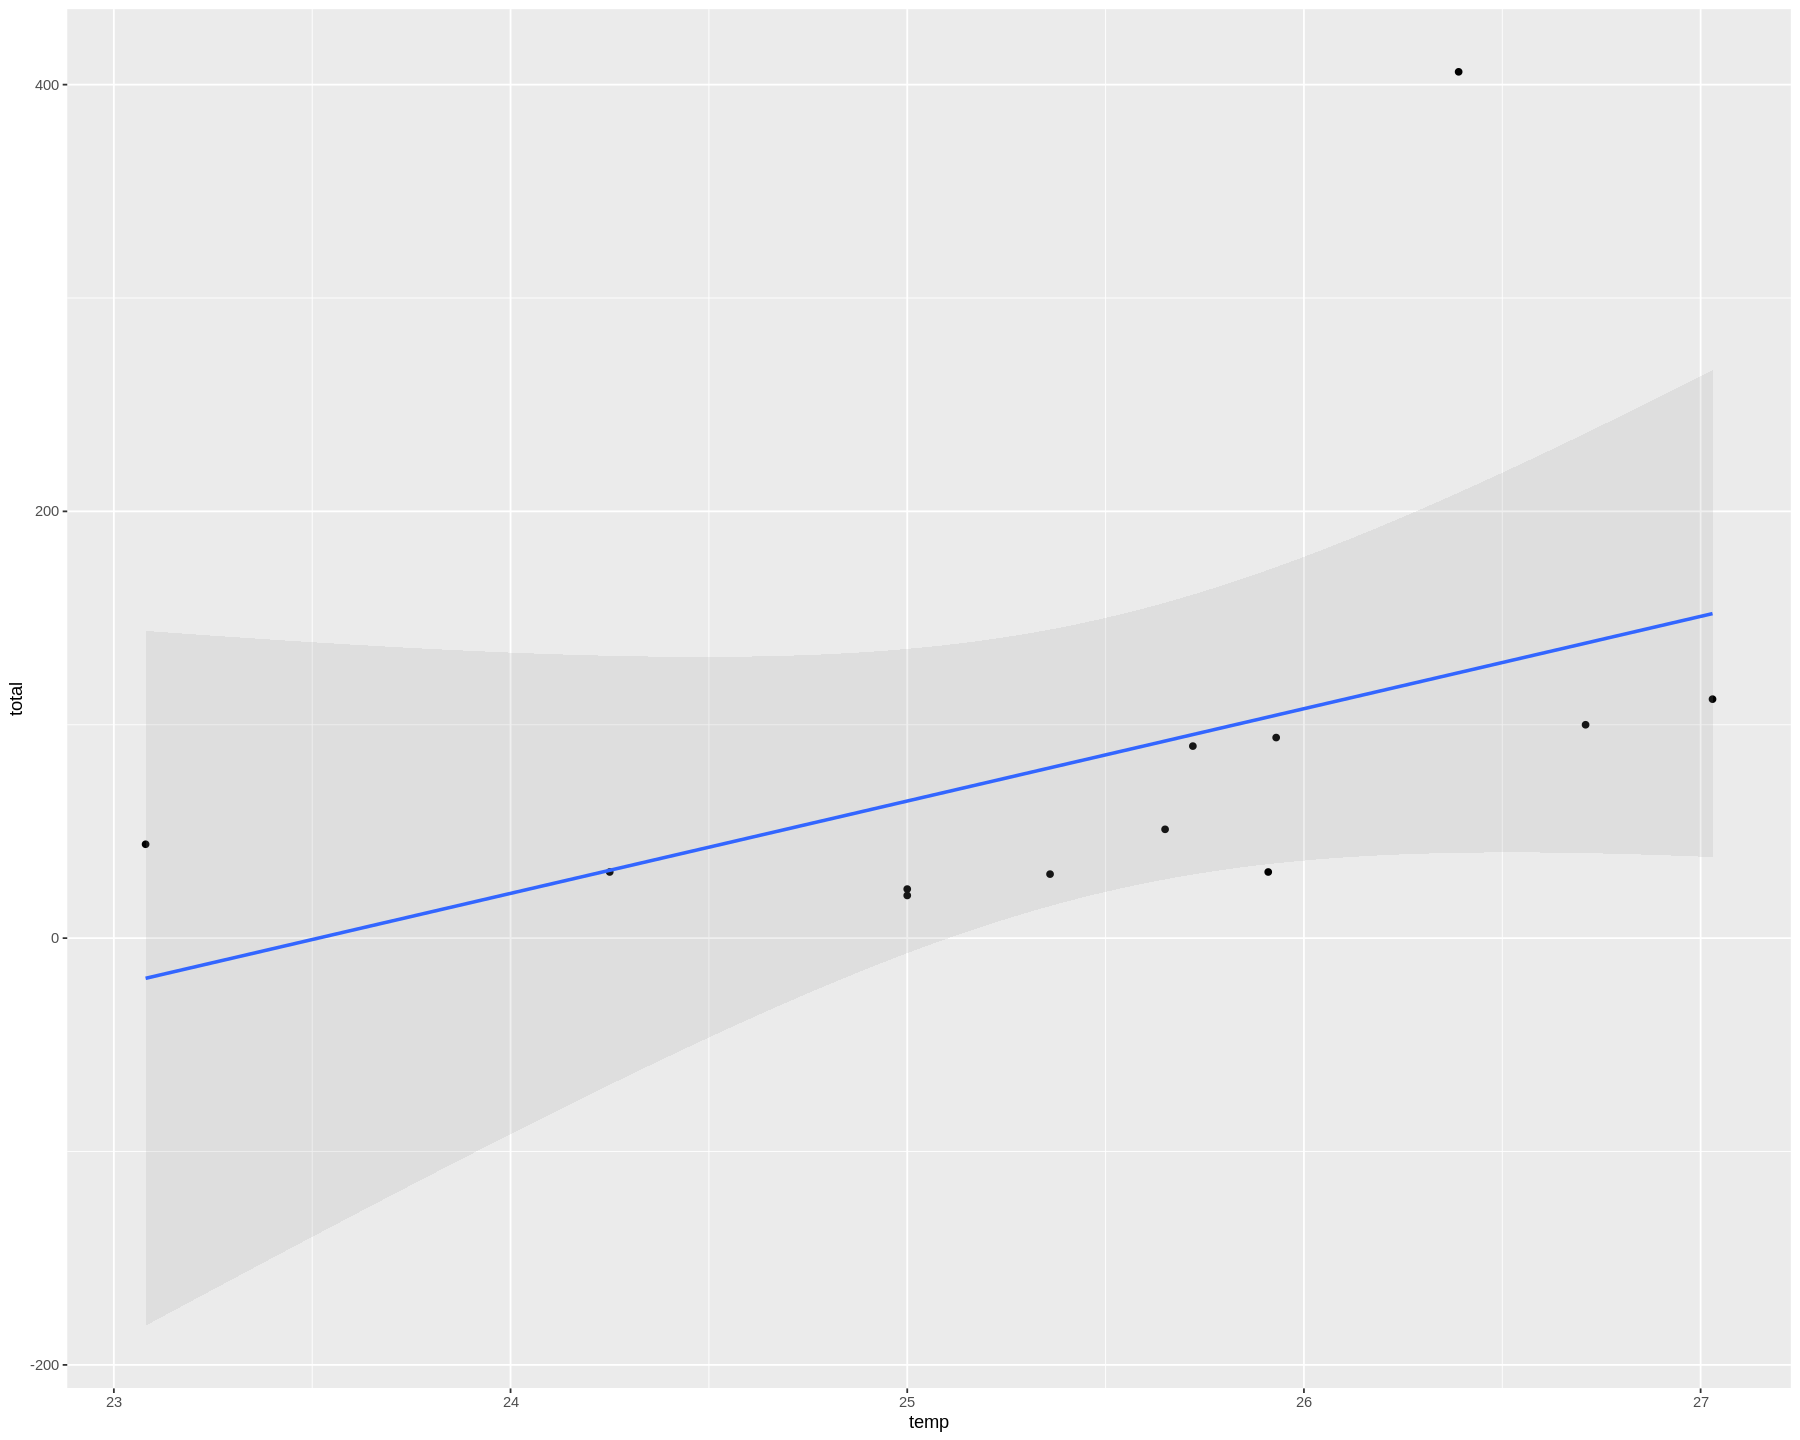

In [ ]:
options(repr.plot.width=15, repr.plot.height=12)

ggplot(df_climatics, aes(x = temp, y = total)) +
  geom_point() +
  geom_smooth(method = "lm", alpha = .15)


`geom_smooth()` using formula 'y ~ x'



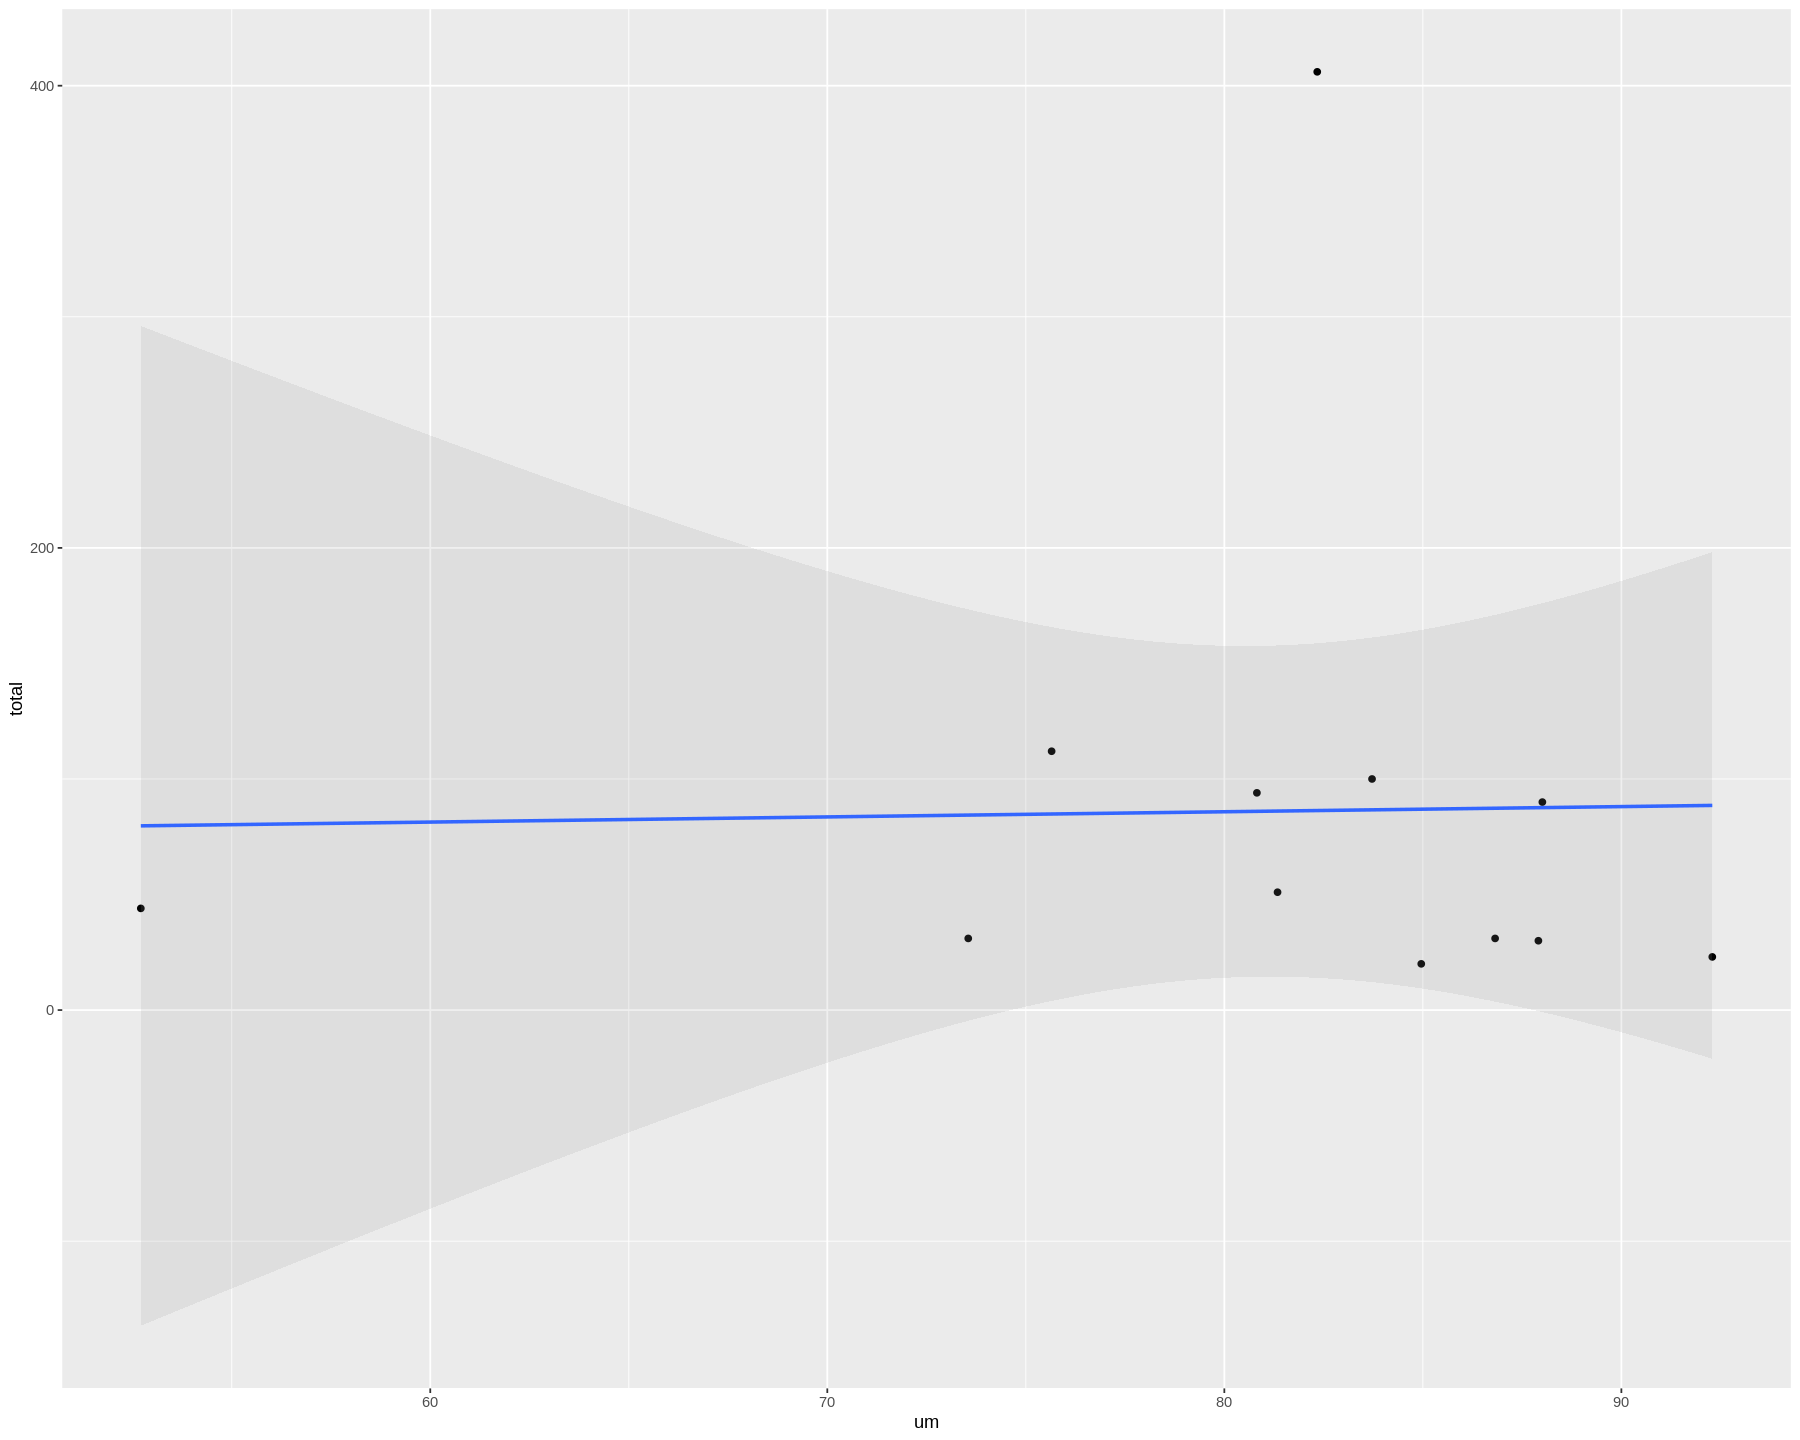

In [ ]:
options(repr.plot.width=15, repr.plot.height=12)

ggplot(df_climatics, aes(x = um, y = total)) +
  geom_point() +
  geom_smooth(method = "lm", alpha = .15)

`geom_smooth()` using formula 'y ~ x'



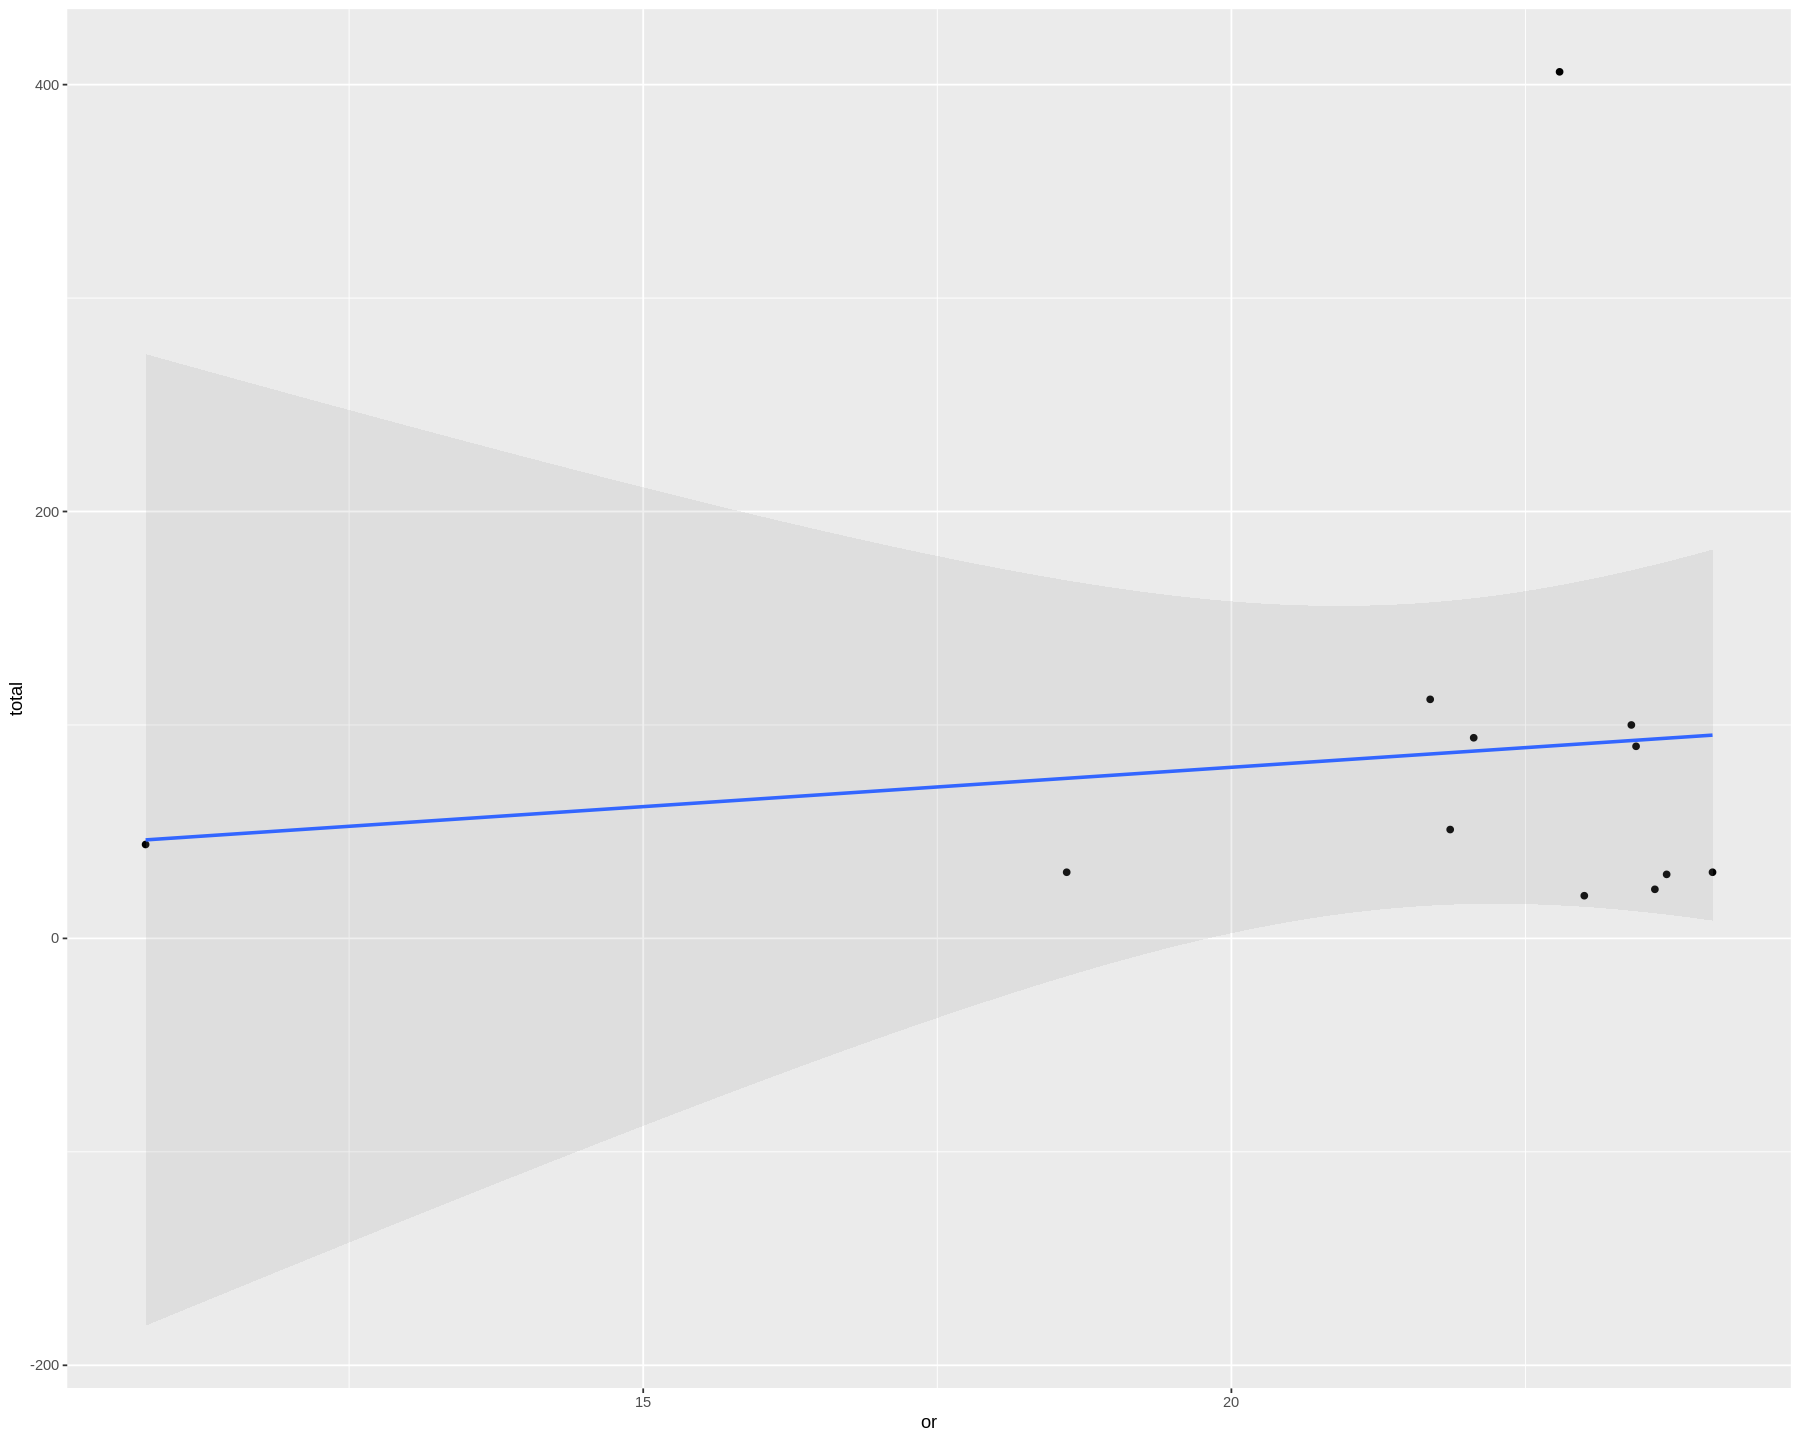

In [ ]:
options(repr.plot.width=15, repr.plot.height=12)

ggplot(df_climatics, aes(x = or, y = total)) +
  geom_point() +
  geom_smooth(method = "lm", alpha = .15)

`geom_smooth()` using formula 'y ~ x'



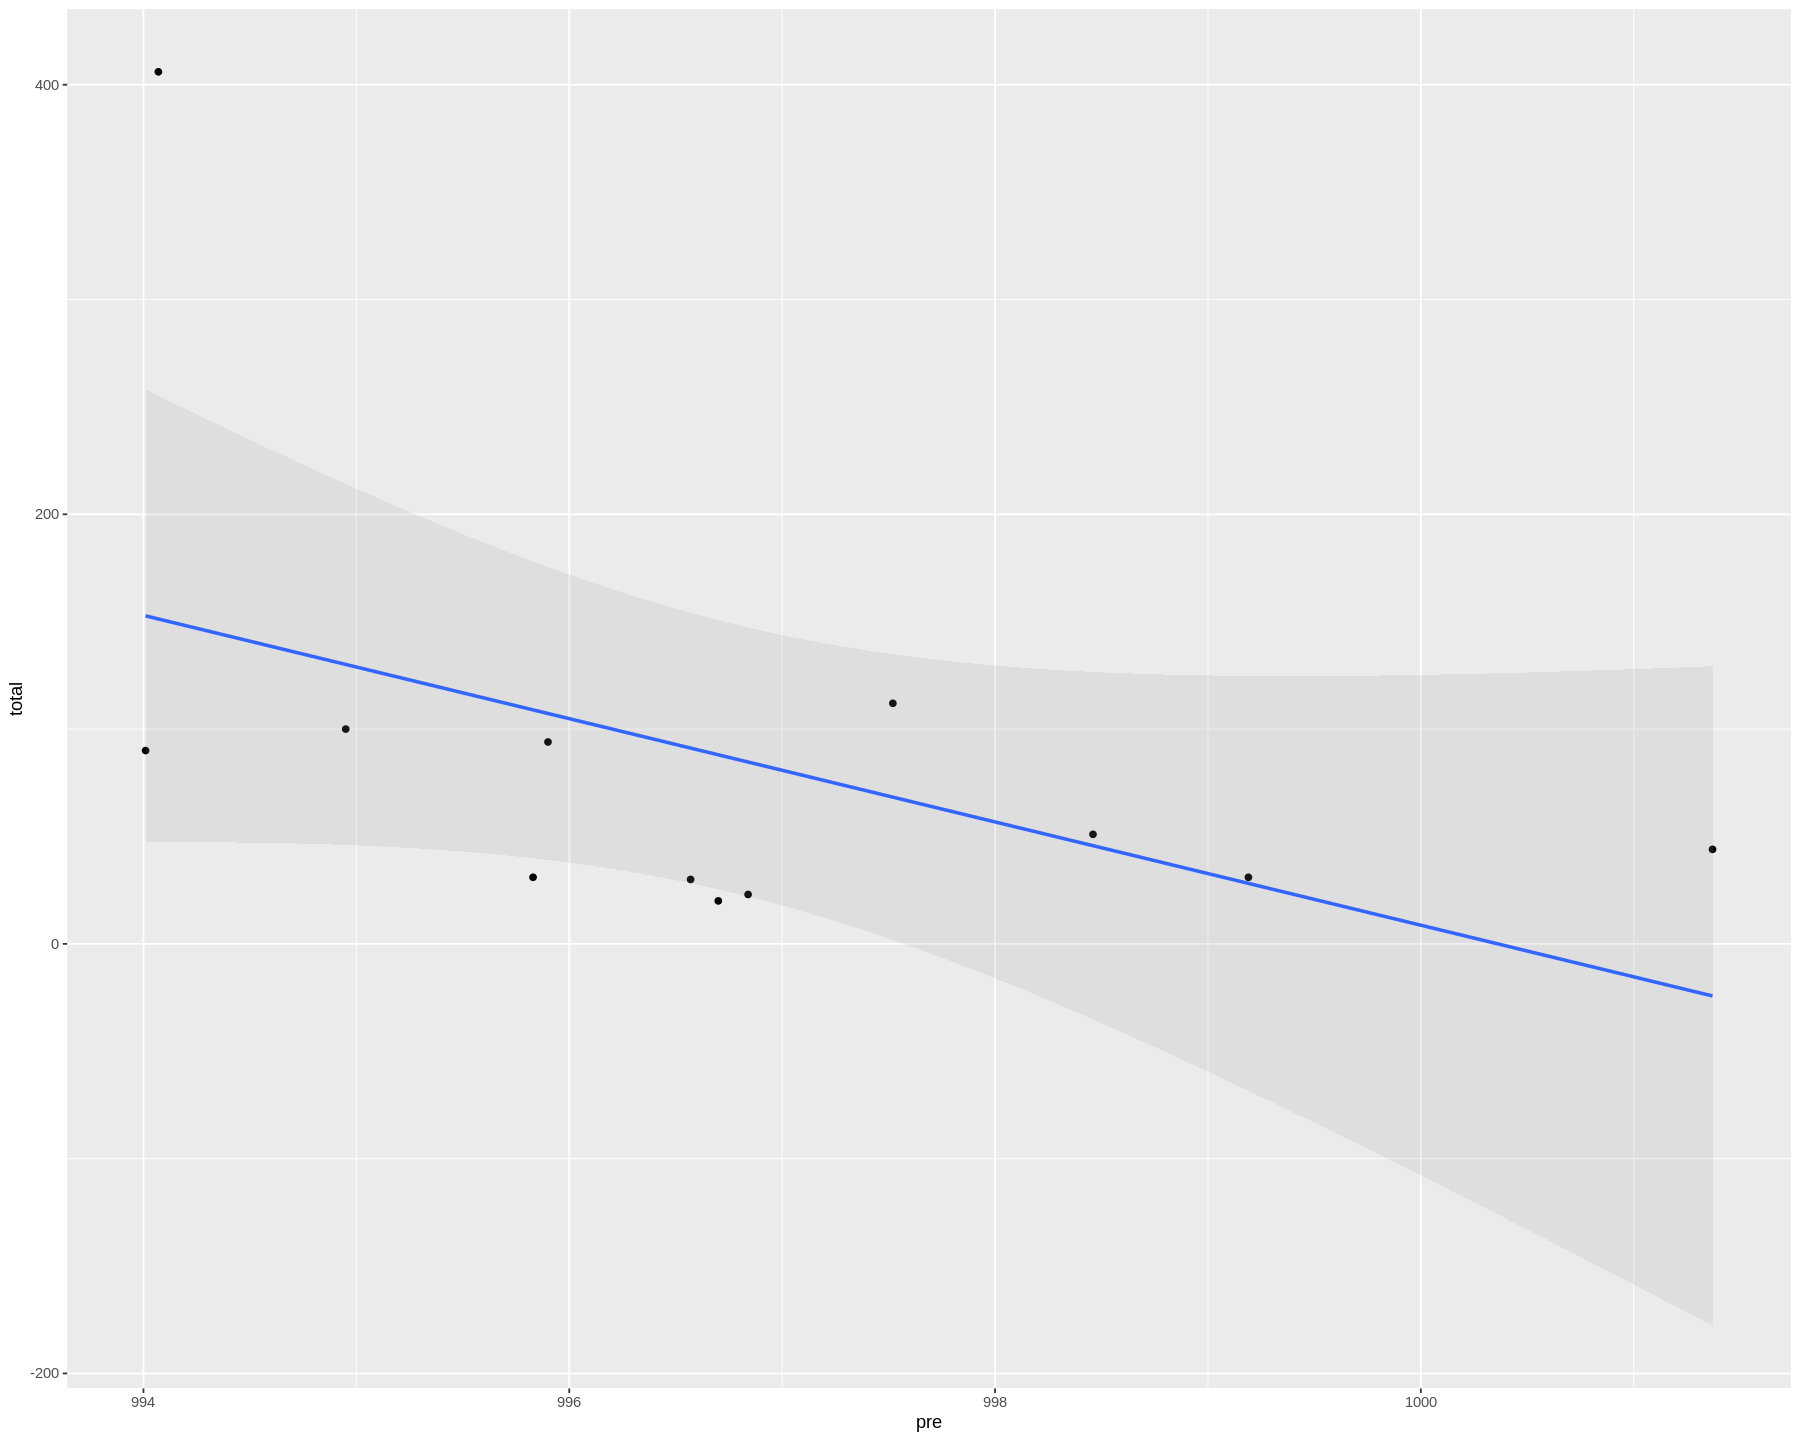

In [ ]:
options(repr.plot.width=15, repr.plot.height=12)

ggplot(df_climatics, aes(x = pre, y = total)) +
  geom_point() +
  geom_smooth(method = "lm", alpha = .15)

In [ ]:
# Rich x Abund

data_rich <- df %>%
  group_by(Localidade, Mês) %>%
  summarise(temp = mean(as.numeric(`Temperatura média (°C)`)),
            um = mean(as.numeric(`Umidade média (%)`)),
            or = mean(as.numeric(`Pto. Orvalho média (°C)`)),
            pre = mean(as.numeric(`Pressão média (hPa)`)),
            rich = n_distinct(`Espécie`))

data_rich[4,3] <- 25.36
data_rich

Warning message in mean(as.numeric(`Temperatura média (°C)`)):
“NAs introduced by coercion”
Warning message in mean(as.numeric(`Temperatura média (°C)`)):
“NAs introduced by coercion”
Warning message in mean(as.numeric(`Temperatura média (°C)`)):
“NAs introduced by coercion”
Warning message in mean(as.numeric(`Temperatura média (°C)`)):
“NAs introduced by coercion”
Warning message in mean(as.numeric(`Temperatura média (°C)`)):
“NAs introduced by coercion”
`summarise()` has grouped output by 'Localidade'. You can override using the `.groups` argument.



Localidade,Mês,temp,um,or,pre,rich
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
P1 - Argeu,Abril,25.91,86.82,24.09,995.83,3
P1 - Argeu,Agosto,23.08,52.71,10.77,1001.37,5
P1 - Argeu,Dezembro,26.71,83.72,23.40,994.95,7
P1 - Argeu,Fevereiro,25.36,87.91,23.70,996.57,3
P1 - Argeu,Janeiro,25.72,88.01,23.44,994.01,6
P1 - Argeu,Julho,24.25,73.55,18.60,999.19,3
P1 - Argeu,Junho,25.65,81.34,21.86,998.46,5
P1 - Argeu,Maio,25.00,84.96,23.00,996.70,4
P1 - Argeu,Março,25.00,92.29,23.60,996.84,5


Warning message:
“Ignoring unknown parameters: family”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 4 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”


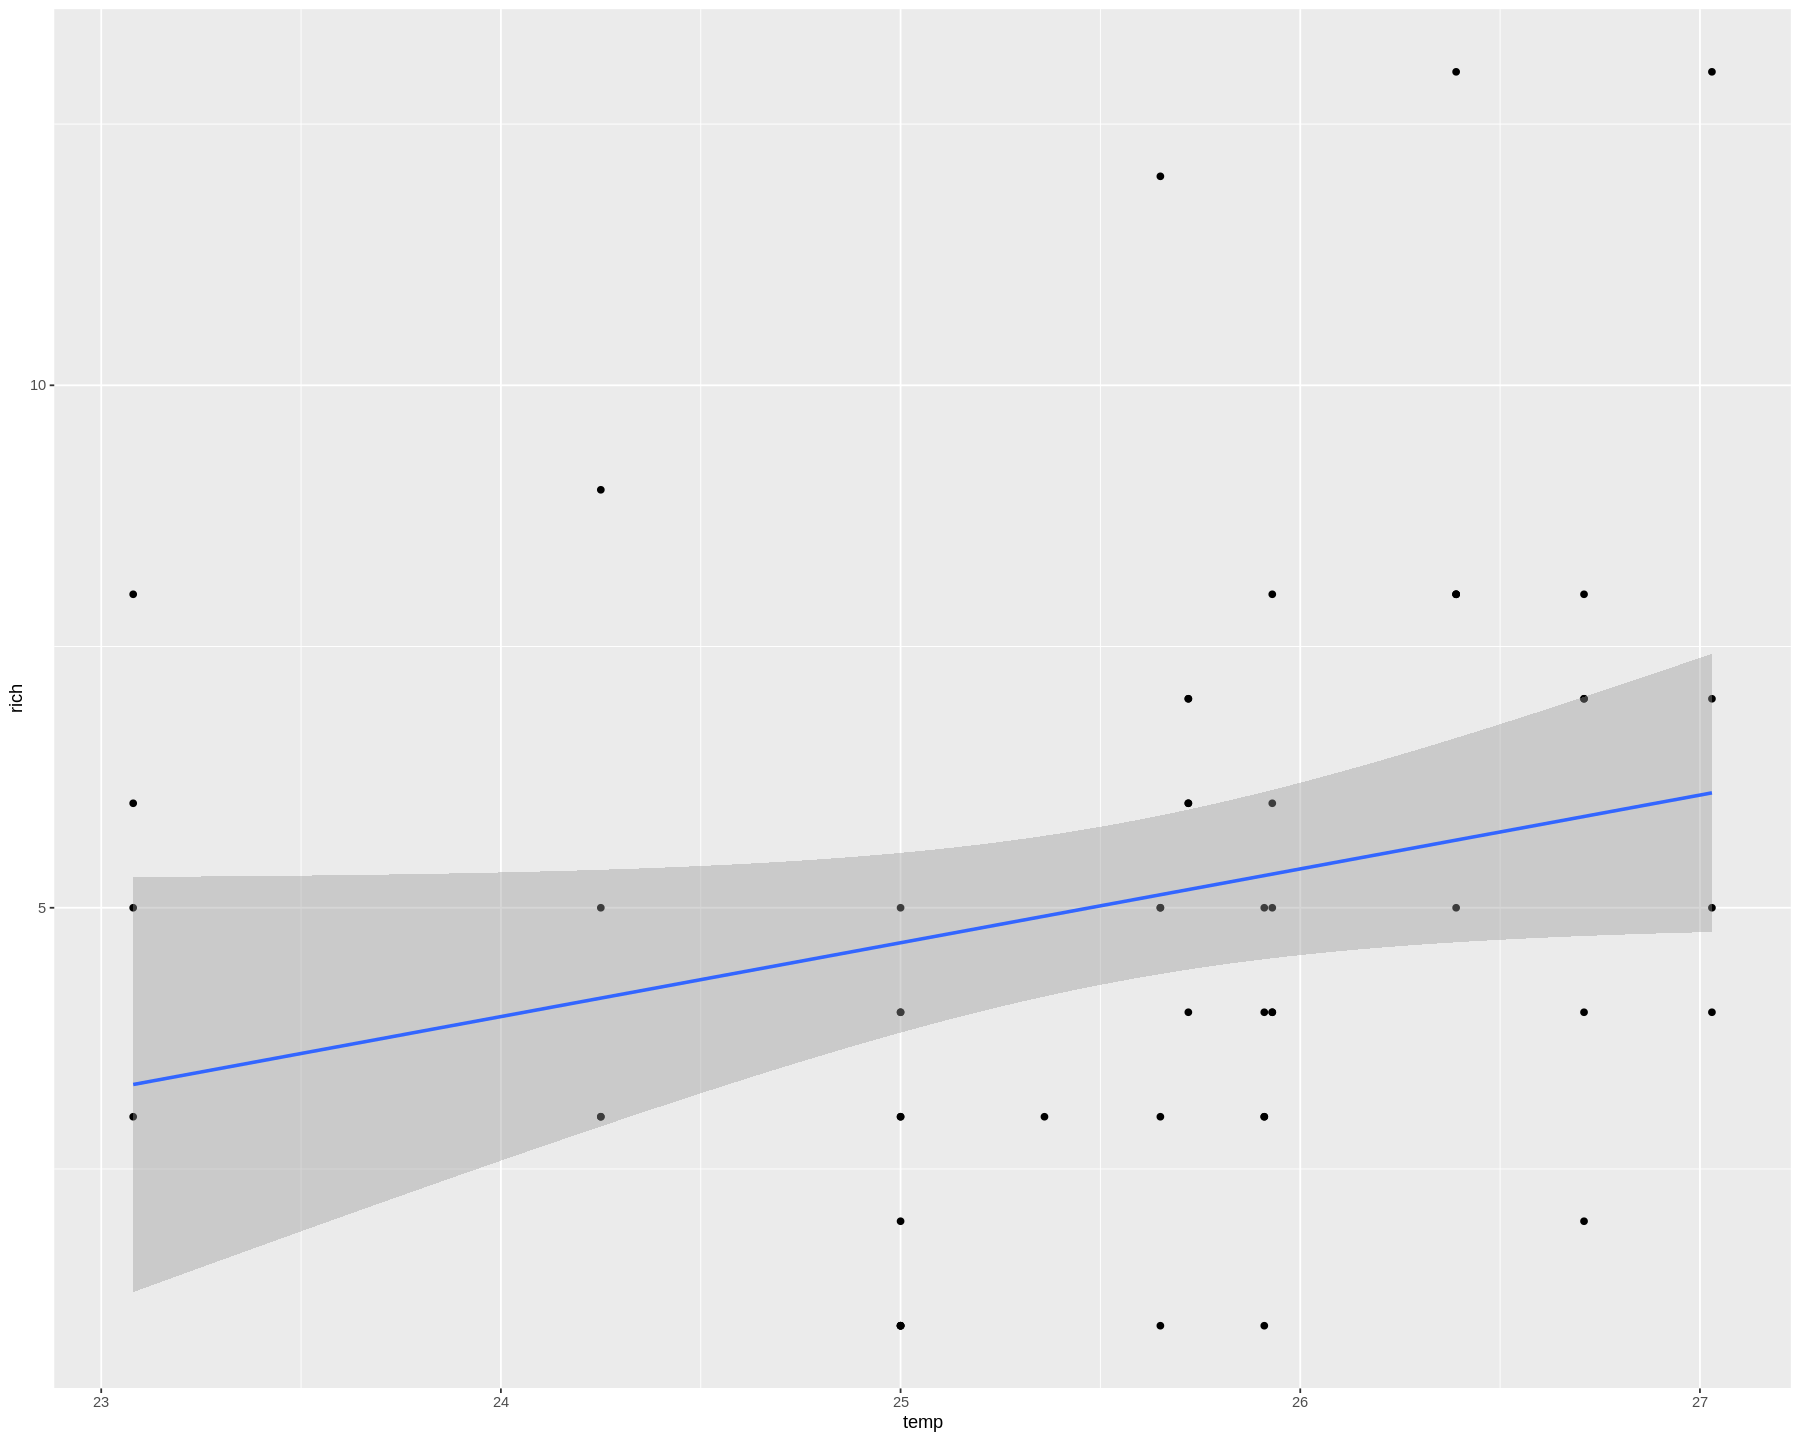

In [ ]:
# Rich x Temp

ggplot(data_rich, aes(x = temp , y = rich)) +
  geom_point() +
  geom_smooth(method="glm", family="poisson", se=TRUE)

In [ ]:
# Modelo 1

model1 <- glm(data = data_rich, rich ~ Mês*temp*um*or*pre, family = poisson)

summary(model1)

anova(model1)


Call:
glm(formula = rich ~ Mês * temp * um * or * pre, family = poisson, 
    data = data_rich)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.25891  -0.88564  -0.09339   0.43029   2.54361  

Coefficients: (180 not defined because of singularities)
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)                  1.16315    0.25000   4.653 3.28e-06 ***
MêsAgosto                    0.54160    0.32856   1.648  0.09928 .  
MêsDezembro                  0.55962    0.31339   1.786  0.07415 .  
MêsFevereiro                -0.06454    0.62915  -0.103  0.91830    
MêsJaneiro                   0.62861    0.30957   2.031  0.04230 *  
MêsJulho                     0.44629    0.33541   1.331  0.18333    
MêsJunho                     0.48551    0.31774   1.528  0.12652    
MêsMaio                     -0.20764    0.37339  -0.556  0.57815    
MêsMarço                    -0.28768    0.38188  -0.753  0.45125    
MêsNovembro                  0.

,Df,Deviance,Resid. Df,Resid. Dev
,<int>,<dbl>,<int>,<dbl>
NULL,NA,NA,52,84.15966
Mês,11,34.80676,41,49.35290
temp,0,0.00000,41,49.35290
um,0,0.00000,41,49.35290
or,0,0.00000,41,49.35290
pre,0,0.00000,41,49.35290
Mês:temp,0,0.00000,41,49.35290
Mês:um,0,0.00000,41,49.35290
temp:um,0,0.00000,41,49.35290


In [ ]:
# Diversidade

abund <- df %>%
  group_by(Espécie, Localidade) %>%
  summarise(total = n()) %>%
  pivot_wider(names_from = Localidade, values_from = total)  %>%
  replace_na(list(`P1 - Argeu` = 0, `P2 - Hélio` = 0, `P3 - Paulo Cabeça` = 0,
                  `P4 - Paulo Vicentino` = 0, `P5 - Nelcivaldo` = 0)) %>%
  column_to_rownames(var = "Espécie")

resultados_tabanidae <- iNEXT(abund,
                              q = c(0, 1, 2),
                              datatype = "abundance",
                              endpoint = 400
)


`summarise()` has grouped output by 'Espécie'. You can override using the `.groups` argument.



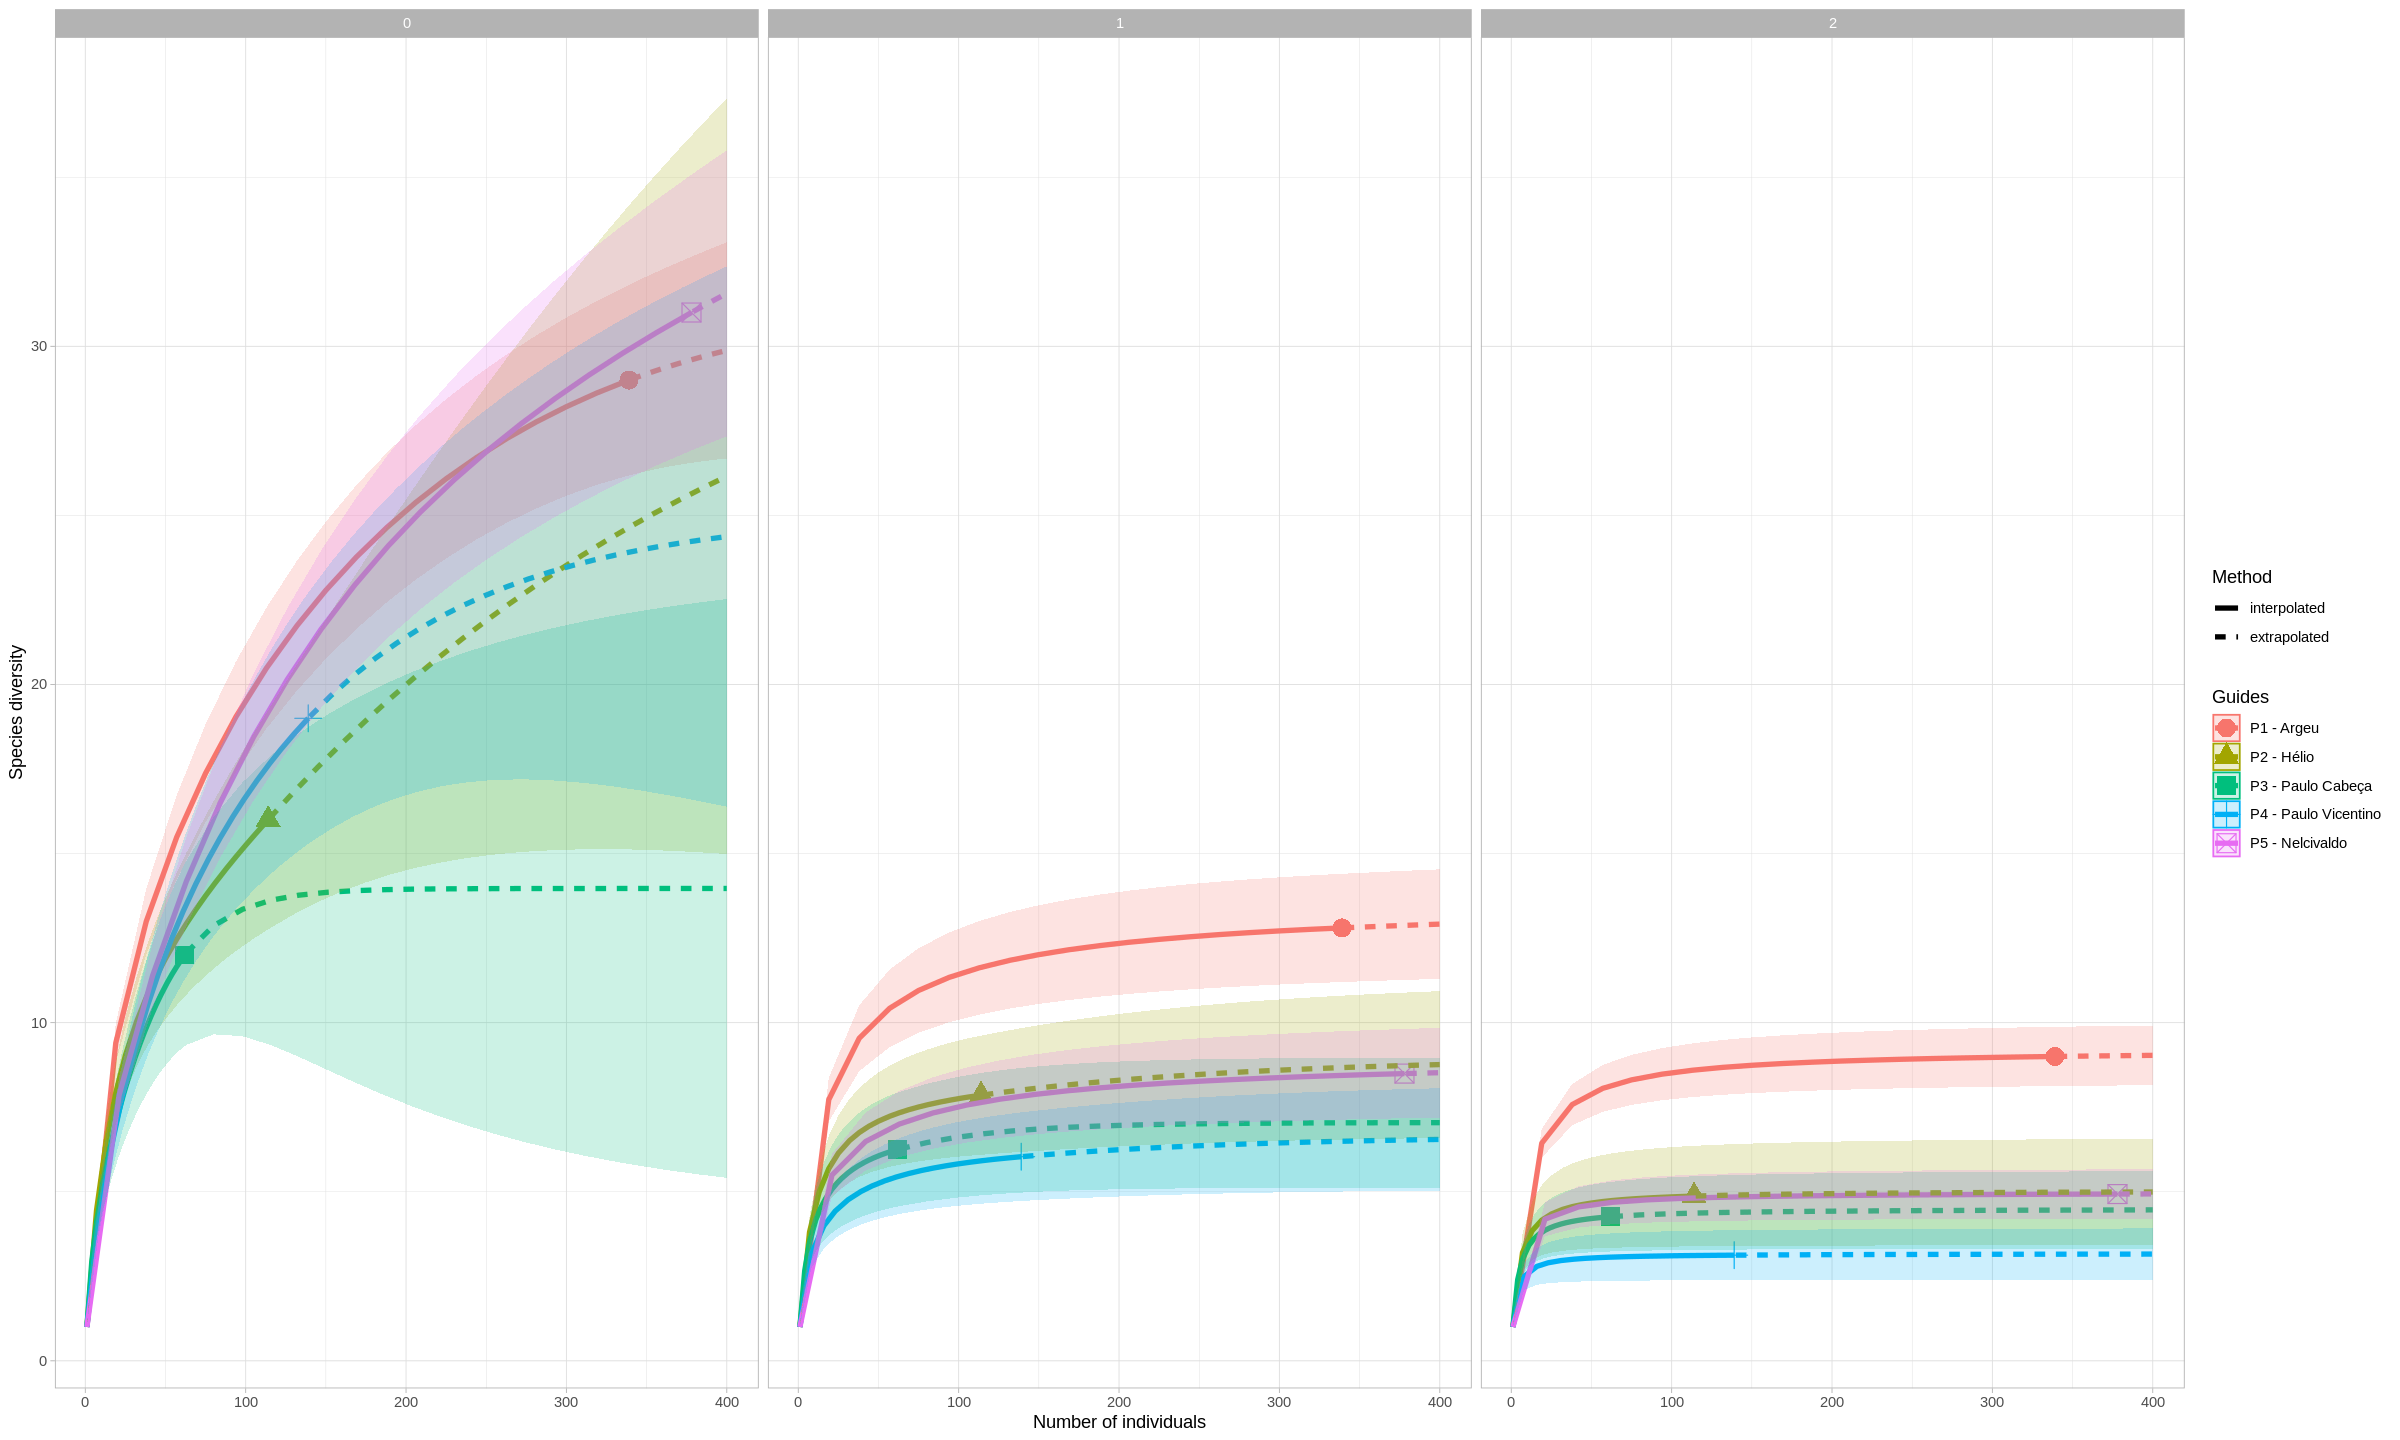

In [ ]:
# Resultado 0 = Species richness; 1 = Shannon diversity; 2 = Simpson diversity

options(repr.plot.width=20, repr.plot.height=12)

ggiNEXT(resultados_tabanidae, type = 1, facet.var = 'order') + theme_light()